In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\admin/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-5-30 Python-3.9.12 torch-1.11.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\admin/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-5-30 Python-3.9.12 torch-1.11.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
img = 'https://assets.entrepreneur.com/content/3x2/2000/20180717194808-GettyImages-805012084.jpeg?auto=webp&quality=95&crop=16:9&width=675'

In [5]:
results = model(img)
results.print()

image 1/1: 380x675 5 persons, 4 cups, 1 dining table
Speed: 524.9ms pre-process, 286.7ms inference, 20.4ms NMS per image at shape (1, 3, 384, 640)


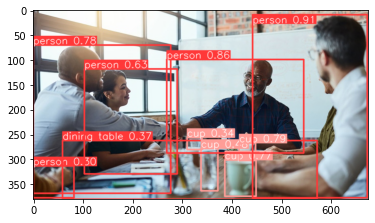

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
results.render()

[array([[[107,  93,  90],
         [105,  91,  88],
         [104,  92,  92],
         ...,
         [180, 170, 158],
         [176, 169, 153],
         [174, 171, 152]],
 
        [[108,  94,  91],
         [106,  92,  89],
         [105,  93,  93],
         ...,
         [196, 193, 178],
         [196, 194, 179],
         [194, 195, 177]],
 
        [[110,  97,  91],
         [108,  94,  91],
         [107,  96,  94],
         ...,
         [203, 197, 183],
         [202, 201, 183],
         [192, 193, 175]],
 
        ...,
 
        [[255,  56,  56],
         [255,  56,  56],
         [255,  56,  56],
         ...,
         [255,  56,  56],
         [255,  56,  56],
         [255,  56,  56]],
 
        [[255,  56,  56],
         [255,  56,  56],
         [255,  56,  56],
         ...,
         [255,  56,  56],
         [255,  56,  56],
         [211,  79,  90]],
 
        [[ 97,  26,  15],
         [129,  34,  24],
         [129,  34,  24],
         ...,
         [165, 100, 116],
  

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [9]:
!cd yolov5 && python train.py --img 640 --batch 16 --epochs 3 --data dataset.yml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   dcf8073..06831aa  master                  -> origin/master
 * [new branch]      cls/test_reset_params   -> origin/cls/test_reset_params
 * [new branch]      coco-segments           -> origin/coco-segments
 * [new branch]      fix/rgb_albumentations  -> origin/fix/rgb_albumentations
 * [new branch]      pip                     -> origin/pip
 * [new branch]      revert-9025-u